# Exploratory Data Analysis - Stroke Dataset
### In the scope of Introduction to Machine Learning & Artificial Inteligence Class, 02/2022

### Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### References
- https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

###### BMI - Obesidade
- https://www.health.harvard.edu/diet-and-weight-loss/bmi-calculator

###### Avg_glucose_level - Diabetes 
- https://duckduckgo.com/?q=diabetes+control+chart&atb=v1-1&iax=images&ia=images&iai=https%3A%2F%2Fi.pinimg.com%2Foriginals%2F7f%2F06%2F33%2F7f063366961350eaea22943348664996.jpg
- https://diabetesmealplans.com/wp-content/uploads/2016/05/DMP-BloodSugar-Levels-Chart.pdf

## Data Importing and Description

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro

In [3]:
file_path = 'C:/Users/ManuelSousa/Documents/Pós-Graduação Applied AI & ML/Bloco 1/Introduction AI & ML/trabalho/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path, header = 0)

# display all columns
pd.options.display.max_columns = None

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Tamanho do dataset
print('Nº linhas:', df.shape[0])
print('Nº colunas:', df.shape[1])

Nº linhas: 5110
Nº colunas: 12


In [6]:
# Colunas no dataset
columns = df.columns.tolist()
print("Colunas:", columns)

Colunas: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [7]:
# Encontra valores nulos no dataset
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Cleaning

In [9]:
# Identifica as linha com valores nulos(NaN)
nan_bmi = df[df['bmi'].isna()]
print(nan_bmi)
# Calcula o peso das linhas com valores nulos no total do conjunto de dados
print('\nPeso(%) dos valores NaN:', (nan_bmi.shape[0]*100)/df.shape[0])

         id  gender   age  hypertension  heart_disease ever_married  \
1     51676  Female  61.0             0              0          Yes   
8     27419  Female  59.0             0              0          Yes   
13     8213    Male  78.0             0              1          Yes   
19    25226    Male  57.0             0              1           No   
27    61843    Male  58.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5039  42007    Male  41.0             0              0           No   
5048  28788    Male  40.0             0              0          Yes   
5093  32235  Female  45.0             1              0          Yes   
5099   7293    Male  40.0             0              0          Yes   
5105  18234  Female  80.0             1              0          Yes   

          work_type Residence_type  avg_glucose_level  bmi   smoking_status  \
1     Self-employed          Rural             202.21  NaN     never

In [10]:
# Lista especificamente o campos categoricos
categorical_col = df.select_dtypes(exclude=np.number).columns
print(categorical_col)

# Mostrar todos os valores presentes em coluna
def column_values(column_name):
    print('\n - ', column_name)
    # unique values in column
    print(df[column_name].unique())
    # check the return type
    print(type(df[column_name].unique()))
    # value counts of each unique value
    print(df[column_name].value_counts())

# Só vão ser analisados os campos categóricos
for col in categorical_col:    
    column_values(col)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

 -  gender
['Male' 'Female' 'Other']
<class 'numpy.ndarray'>
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

 -  ever_married
['Yes' 'No']
<class 'numpy.ndarray'>
Yes    3353
No     1757
Name: ever_married, dtype: int64

 -  work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
<class 'numpy.ndarray'>
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

 -  Residence_type
['Urban' 'Rural']
<class 'numpy.ndarray'>
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

 -  smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
<class 'numpy.ndarray'>
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


#### Algumas observações sobre o dataset: 
- Existem linhas com campos nulos, nomeadamente na feature "bmi". Como essas linhas com valores nulos têm apenas um peso de 3% no dataset e aplicar uma média/mediana para transformar esses campos não é a melhor abordagem devido à incerteza dos valores, estas linhas vão ser eliminadas;
- A feature "gender", supostamente um campo binário, apresenta um valor desconhecido (Other). Vai ser analisado o peso que este campo tem no dataset e se possivel vai ser eliminado;
- A feature "smoking_status" apresenta valores "unknown", tal como indicado na descrição do problema. Vai ser análisado pois caso este campo tenha pouco peso vai ser estudada a possibilidade de o eliminar. 

In [11]:
# Foi detectado um valor desconhecido na feature "gender". Vai proceder-se à sua limpeza.
# Verificar as linhas em que o genero aparece como "Other"
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [12]:
# Eliminar todas a linha com genero desconhecido
# drop rows that contain specific 'value' in 'column_name'
df = df[df.gender != 'Other']

In [13]:
unk_smoking_status = df[df['smoking_status'] == 'Unknown']
print('\nPeso(%) dos valores Unknown:', (unk_smoking_status.shape[0]*100)/df.shape[0])


Peso(%) dos valores Unknown: 30.221178312781365


Nota: Os campos Unknown vão manter-se pois têm bastante peso no dataset.

In [14]:
# Vai eliminar-se a coluna ID, pois não tem utilidade
# drop one column by name
df.drop('id', axis=1, inplace=True)

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
df1 = df.dropna()
print(df1.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [16]:
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

#### Detetar outliers em features numéricas

In [17]:
# Identificar e avaliar a presença de outliers nas features numéricas - age, avg_glucose_level e bmi

def box_plotting(dframe, column_name):
    print("\n - ", column_name)
    # Gera gráfico caixa de bigodes
    sns.boxplot(dframe[column_name])

    # Calcular os quartis e o indice quartil
    q1 = dframe[column_name].quantile(0.25)
    q3 = dframe[column_name].quantile(0.75)
    IQR = q3 - q1
    median = dframe[column_name].median()
    print("Quartil 1: ", q1)
    print("Mediana: ", median)
    print("Quartil 3: ", q3)
    print("Interquantil Range (IQR): ", IQR)

    # Cacular os limites min/max para calcular outliers
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    print("Limite Superior:", upper)
    print("Limite Inferior:", lower)
    
    # calcular o peso dos outliers
    clean_data = dframe[~((dframe[column_name] < lower) |(dframe[column_name] > upper))]
    outliers_count = dframe.shape[0] - clean_data.shape[0]
    print("Quantidade outliers:", outliers_count)
    print("Peso outliers %:", (outliers_count*100)/dframe.shape[0])
    
    return {'q1': q1, 'q3': q3, 'median': median, 'iqr': IQR, 'lower': lower, 'upper': upper}



 -  age
Quartil 1:  25.0
Mediana:  44.0
Quartil 3:  60.0
Interquantil Range (IQR):  35.0
Limite Superior: 112.5
Limite Inferior: -27.5
Quantidade outliers: 0
Peso outliers %: 0.0


C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


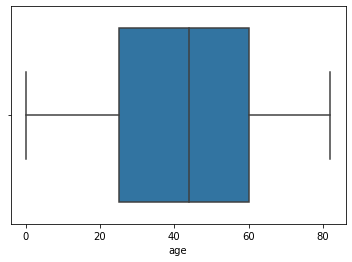

In [18]:
outliers_age = box_plotting(df1, 'age')


 -  avg_glucose_level


C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Quartil 1:  77.0675
Mediana:  91.68
Quartil 3:  113.495
Interquantil Range (IQR):  36.42750000000001
Limite Superior: 168.13625000000002
Limite Inferior: 22.426249999999982
Quantidade outliers: 569
Peso outliers %: 11.593317033414833


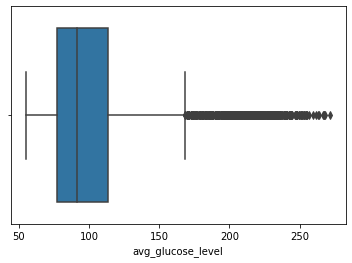

In [19]:
outliers_avg_glucose_level = box_plotting(df1, 'avg_glucose_level')


 -  bmi
Quartil 1:  23.5
Mediana:  28.1
Quartil 3:  33.1
Interquantil Range (IQR):  9.600000000000001
Limite Superior: 47.5
Limite Inferior: 9.099999999999998
Quantidade outliers: 110
Peso outliers %: 2.2412387938060307


C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


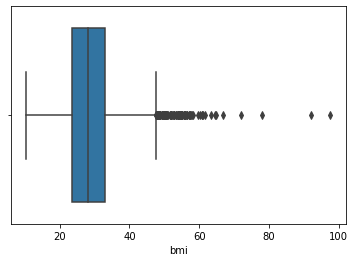

In [20]:
outliers_bmi = box_plotting(df1, 'bmi')

#### Testar o impacto no dataset ao removermos os outliers:

In [21]:
clean_data1 = df1[~((df1["bmi"] < outliers_bmi['lower']) |(df1["bmi"] > outliers_bmi['upper']))]
print(clean_data1.shape[0])
print(df1.shape[0])

4798
4908


In [22]:
clean_data2 = df1[~((df1["avg_glucose_level"] < outliers_avg_glucose_level['lower']) |(df1["avg_glucose_level"] > outliers_avg_glucose_level['upper']))]
print(clean_data2.shape[0])
print(df1.shape[0])

4339
4908


#### Nota: Sendo que nem sempre os outliers são necessáriamente "maus dados", fica a dúvida qual será o custo/beneficio ao eliminar estes valores correndo o risco de ficar com um dataset mais pequeno.

In [23]:
df1.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274395,0.257104,0.236000,0.333314,0.232313
hypertension,0.274395,1.000000,0.115978,0.180614,0.167770,0.142503
heart_disease,0.257104,0.115978,1.000000,0.154577,0.041322,0.137929
avg_glucose_level,0.236000,0.180614,0.154577,1.000000,0.175672,0.138984
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.232313,0.142503,0.137929,0.138984,0.042341,1.000000


In [24]:
# Tamanho do dataset limpo
print('Nº linhas:', df1.shape[0])
print('Nº colunas:', df1.shape[1])

Nº linhas: 4908
Nº colunas: 11


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


In [26]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Nota importante: Após análise dos dados dos inviduos menores de idade (<18) foram identificadas incoerências relativas à atribuição de posições de trabalho (work_type). Desta forma vai proceder-se à limpeza destes dados sem sentido.

In [27]:
df1[(df1.age < 18) & (df1.work_type != 'children')]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0
288,Female,17.0,0,0,No,Self-employed,Urban,82.18,23.4,Unknown,0
395,Female,17.0,0,0,No,Private,Urban,87.52,39.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4950,Female,17.0,0,0,No,Private,Urban,68.86,41.1,never smoked,0
4981,Male,15.0,0,0,No,Private,Urban,65.05,24.6,Unknown,0
5003,Male,17.0,0,0,No,Private,Urban,63.28,40.2,Unknown,0
5004,Female,17.0,0,0,No,Private,Urban,82.64,31.1,Unknown,0


In [28]:
# Vamos eliminar 165 registos do dataset
df1 = df1.drop(df1[(df1.age < 18) & (df1.work_type != 'children')].index)

In [29]:
# Verificar se há individuos maiores de idade com work_type children - negativo!
df1[(df1.age >= 18) & (df1.work_type == 'children')]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [30]:
df1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000
mean,43.819549,0.094877,0.051233,105.678813,28.963884,0.044065
std,22.349539,0.293075,0.220497,44.812621,7.809089,0.205261
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,27.000000,0.000000,0.000000,77.110000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.200000,0.000000
75%,61.000000,0.000000,0.000000,113.680000,33.150000,0.000000
max,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000



 -  age
Quartil 1:  27.0
Mediana:  45.0
Quartil 3:  61.0
Interquantil Range (IQR):  34.0
Limite Superior: 112.0
Limite Inferior: -24.0
Quantidade outliers: 0
Peso outliers %: 0.0


C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


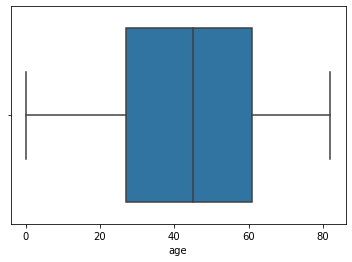

In [31]:
outliers_age = box_plotting(df1, 'age')


 -  avg_glucose_level
Quartil 1:  77.11
Mediana:  91.88
Quartil 3:  113.68
Interquantil Range (IQR):  36.57000000000001
Limite Superior: 168.53500000000003
Limite Inferior: 22.25499999999999
Quantidade outliers: 562
Peso outliers %: 11.849040691545435


C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


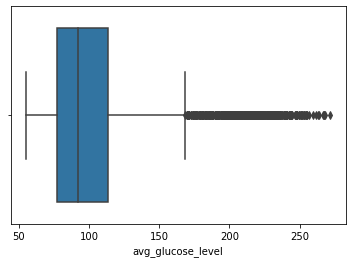

In [32]:
outliers_avg_glucose_level = box_plotting(df1, 'avg_glucose_level')


 -  bmi
Quartil 1:  23.7
Mediana:  28.2
Quartil 3:  33.150000000000006
Interquantil Range (IQR):  9.450000000000006
Limite Superior: 47.32500000000002
Limite Inferior: 9.52499999999999
Quantidade outliers: 111
Peso outliers %: 2.340290955091714


C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


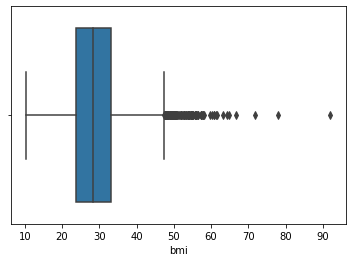

In [33]:
outliers_bmi = box_plotting(df1, 'bmi')

## Data Visualization


 -  age
0.9688894152641296 7.177722730979715e-31
Não tem distribuição normal - Rejeição H0

 -  bmi
0.9604966044425964 4.2220023968617745e-34
Não tem distribuição normal - Rejeição H0

 -  avg_glucose_level
0.8055528998374939 0.0
Não tem distribuição normal - Rejeição H0


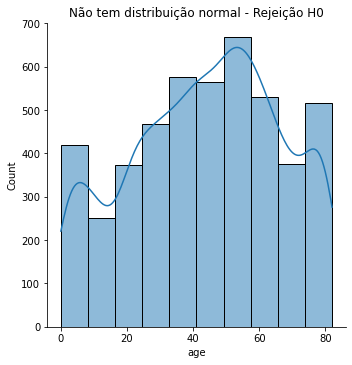

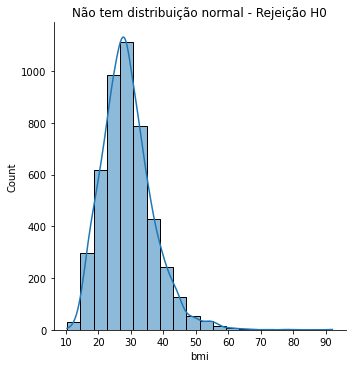

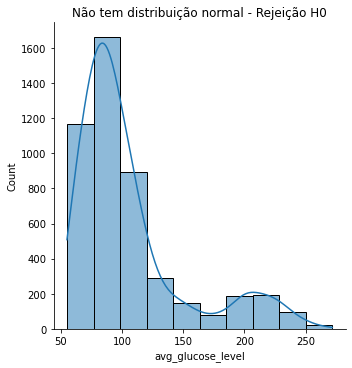

In [34]:
# hsit age bmi avg_glucose_level
# pie binários gender stroke hypertension etc

def build_histogram(feature, bins=10):
    print("\n - ", feature)
    # Shapiro Wilk Test - teste de distribuição normal
    from scipy.stats import shapiro
    w, p = shapiro(df1[feature])
    print(w, p)

    if p < 0.05:
        test_answer = "Não tem distribuição normal - Rejeição H0"
    else:
        test_answer = "Tem distribuição normal - Falhou a rejeição H0"
    print(test_answer)

    # Gera gráfico histograma
    #plt.hist(df1[feature])    
    #plt.title(test_answer)
    sns.displot(df1[feature], bins=bins, kde=True).set(title=test_answer)
    #sns.title(test_answer)


build_histogram('age')

build_histogram('bmi', bins=20)

build_histogram('avg_glucose_level')

In [35]:
df1.gender.value_counts()

Female    2808
Male      1935
Name: gender, dtype: int64

In [36]:
def plot_bar(feature):
    fig, (ax1, ax2) = plt.subplots(1,2)
    df1[feature].value_counts().plot(kind = 'pie', title=feature, autopct='%1.1f%%', ax=ax1)
    df1[feature].value_counts().plot(kind = 'bar', title=feature, ylabel='count', ax=ax2)
    plt.show()

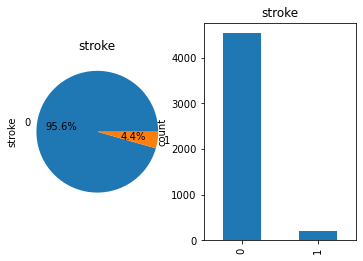

In [37]:
plot_bar('stroke')

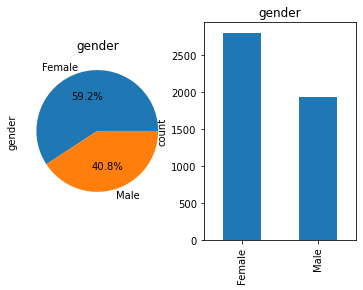

In [38]:
plot_bar('gender') 

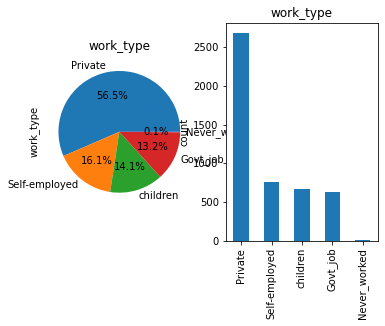

In [39]:
plot_bar('work_type')

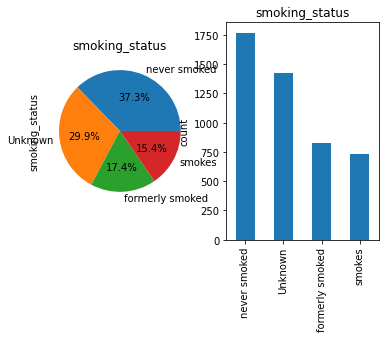

In [40]:
plot_bar('smoking_status') 

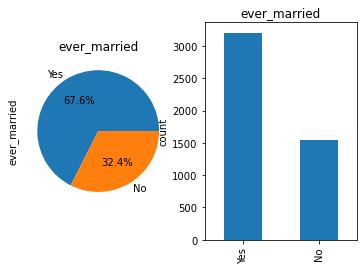

In [41]:
plot_bar('ever_married') 

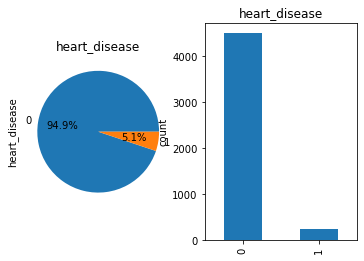

In [42]:
#Heart_disease
plot_bar('heart_disease')

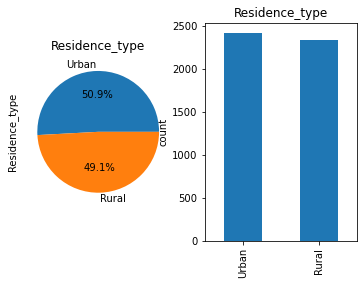

In [43]:
#Residence_type
plot_bar('Residence_type')

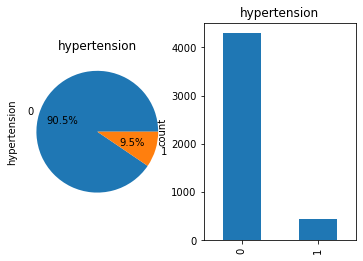

In [44]:
# hypertension
plot_bar('hypertension')

## Data Transformation

#### 1 - Converter as variávies numéricas (e binárias) em numéricas: gender, ever_married e Residence_type

In [45]:
label_encoder = LabelEncoder()
df2 = df1 # Criar outra dataframe, deixando 
df2['gender'] = label_encoder.fit_transform(df2['gender'])
df2['ever_married'] = label_encoder.fit_transform(df2['ever_married'])
df2['Residence_type'] = label_encoder.fit_transform(df2['Residence_type'])

In [46]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


#### 2 - Utilziar One_Hot_Encoder para as variáveis categóricas em binárias: work_type, smoking_status

In [47]:
df2 = pd.get_dummies(df1, prefix=['work_type', 'smoking_status'], prefix_sep="_")

In [48]:
df2

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,0,103.08,18.6,0,0,0,0,0,1,1,0,0,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [49]:
df2.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.00000,4743.000000
mean,0.407970,43.819549,0.094877,0.051233,0.675522,0.508539,105.678813,28.963884,0.044065,0.131562,0.001054,0.565043,0.160869,0.141472,0.299389,0.173941,0.37276,0.153911
std,0.491509,22.349539,0.293075,0.220497,0.468229,0.499980,44.812621,7.809089,0.205261,0.338050,0.032455,0.495804,0.367448,0.348544,0.458039,0.379098,0.48359,0.360901
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,77.110000,23.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.880000,28.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,113.680000,33.150000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


## Data Analysis

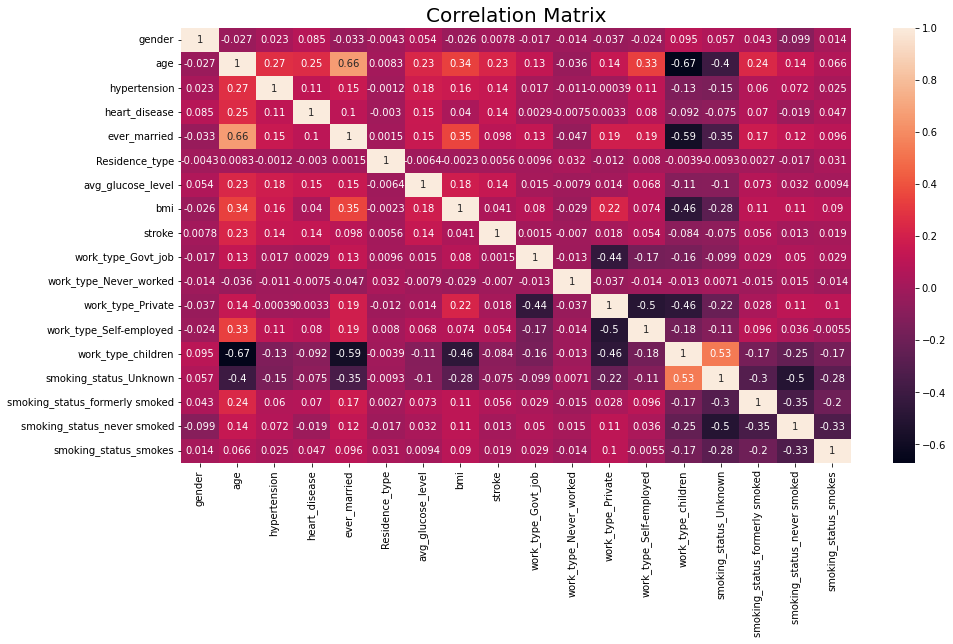

In [50]:
# Correlação entre features
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df2.corr(), annot = True)
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

#### Conclusões
- O bmi tem correlação com a idade e o estado de casado;
- stroke tem maior correlação com a idade, ligeiramente com hipertensão, doença cardiaca e diabates, por ultimo o estado de casado
- o stroke n tem relação com o bmi
- o facto de trabalhar no privado tem alguma relação com o bmi(obesidade)
- o tipo de residencia n tem qualquer relação
- ser fumador n afeta - confirmar em gráfico
- A idade além de ser a feature com maior correlação, ela própria tem bastante correlação com outras features chave, daí ser importante comparar esta feature com as restantes, pois está visto que com a idade aumenta outros problemas de saude que acabam por se tornar relevantes ainda que a correlação não seja direta à variável target avc.

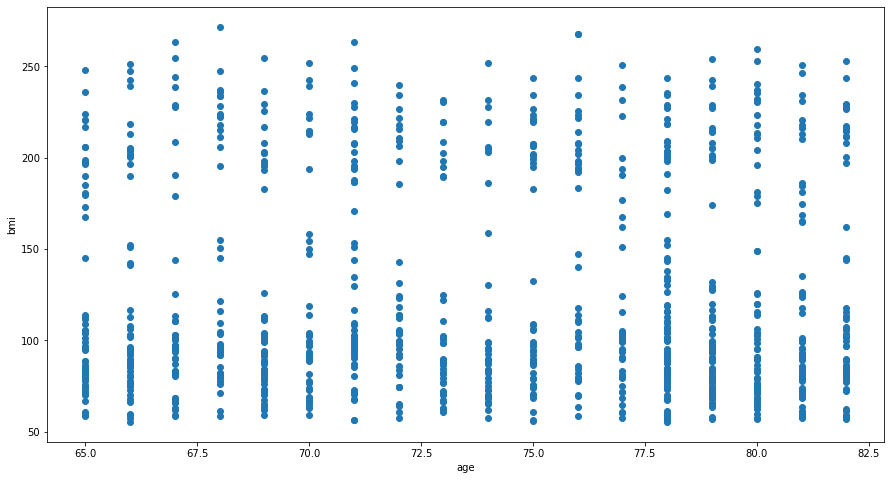

In [51]:
teste = df2[(df2.age >= 65)]
plt.scatter(teste.age, teste.avg_glucose_level)
plt.xlabel("age")
plt.ylabel("bmi")
#plt.legend(loc='upper left')
plt.show()
#teste.age

In [52]:
# Conclusões a tirar do dataset

# analisar os strokes por métricas ligadas com a saude(bmi, age, hypertension, heart_disease) e
# com métricas ligadas ao ambiente pessoal (casado?, tipo de residencia, trabalho?)

# Com que idade é mais provevel ter um avc?

# Qual o estilo de vida mais aconselhavel para a prevenção de avc? Qual o estilo propicio a avc?

In [53]:
# Pela distribuição avalir os dados disponiveis de bmi e diabetes
# Verificar a correlação entre as variáveis de saude
# confirmar o statment sobre o ser fumador n estar relacionado com os strokes

In [54]:
df_strokes = df1[df1.stroke == 1]

In [55]:
df_strokes.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.0
mean,0.425837,67.712919,0.287081,0.191388,0.889952,0.521531,134.571388,30.471292,1.0
std,0.495657,12.402848,0.453486,0.394338,0.313701,0.500736,62.462047,6.329452,0.0
min,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,56.110000,16.900000,1.0
25%,0.000000,58.000000,0.000000,0.000000,1.000000,0.000000,80.430000,26.400000,1.0
50%,0.000000,70.000000,0.000000,0.000000,1.000000,1.000000,106.580000,29.700000,1.0
75%,1.000000,78.000000,1.000000,0.000000,1.000000,1.000000,196.920000,33.700000,1.0
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [56]:
df_strokes.work_type.value_counts()

Private          127
Self-employed     53
Govt_job          28
children           1
Name: work_type, dtype: int64

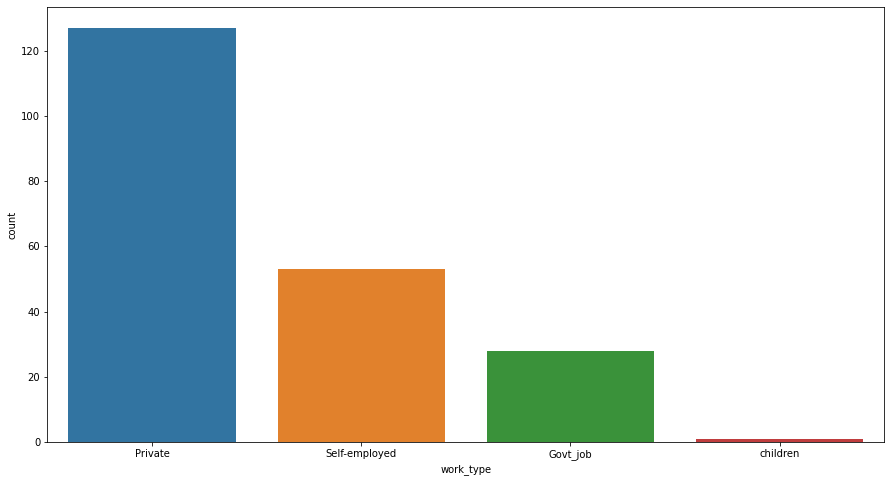

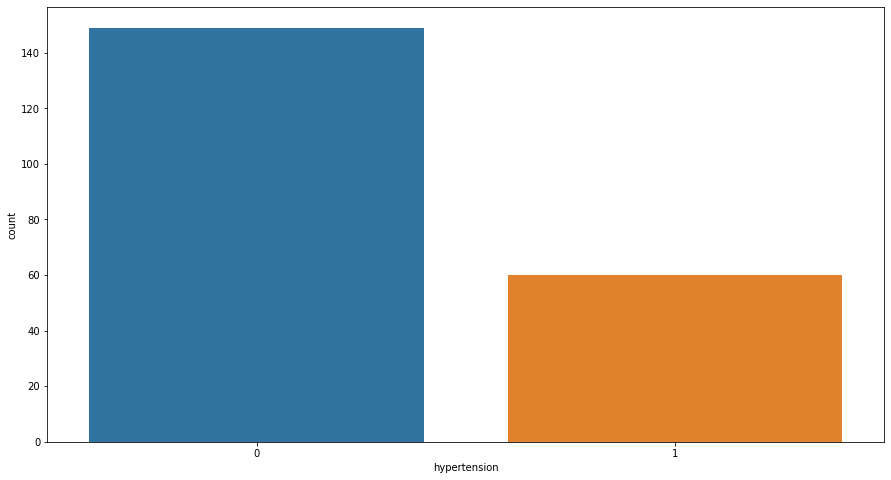

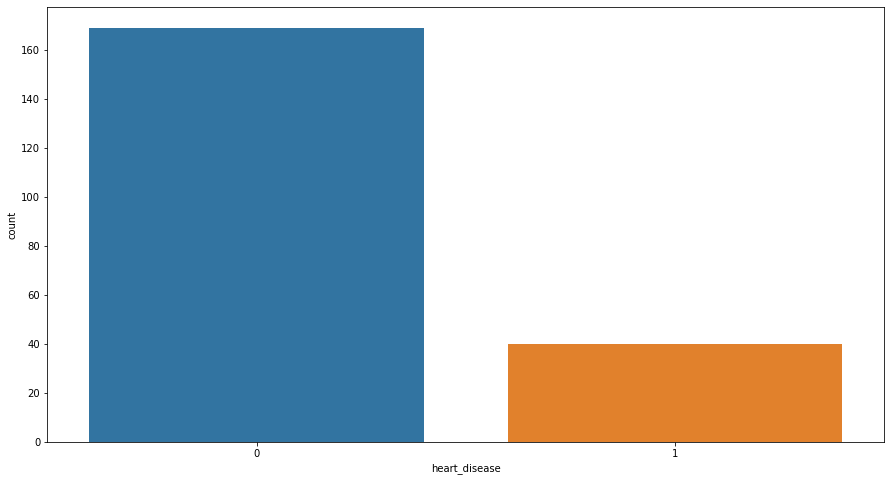

In [57]:
sns.countplot(x='work_type', data=df_strokes)
plt.show()
sns.countplot(x='hypertension', data=df_strokes)  # quase um 1/3 
plt.show()
sns.countplot(x='heart_disease', data=df_strokes)  # 1/4
plt.show()

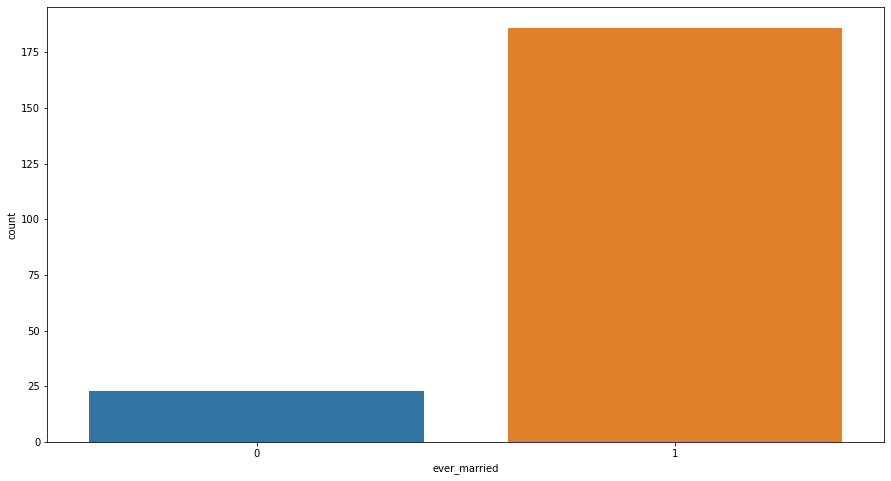

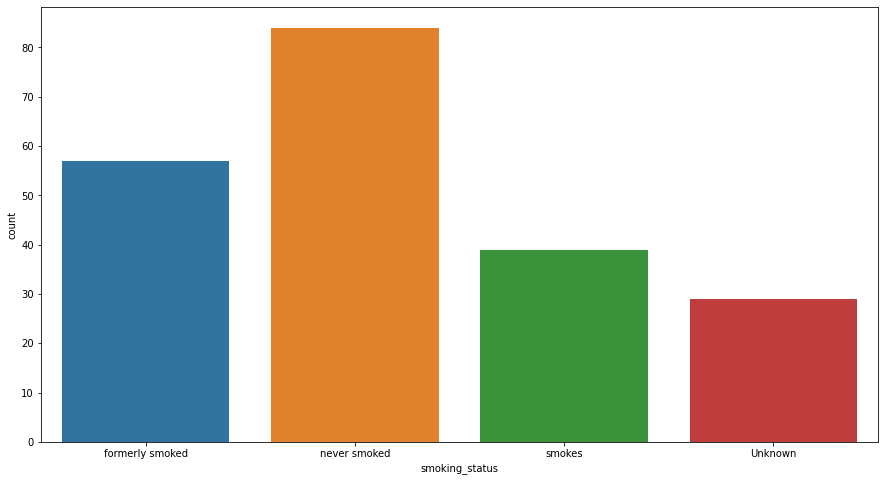

In [58]:
sns.countplot(x='ever_married', data=df_strokes) 
plt.show()
sns.countplot(x='smoking_status', data=df_strokes) # confirma o statment sobre o ser fumador n estar relacionado com os strokes
plt.show()
# N vou avaliar o tipo de residencia porque n existe qualquer correlação

### Notas - sobre as pessoas que tiveram AVCs:
- Quase 1/3 tinha hipertensão;
- A maioria das pessoas trabalahva no privado. No entanto os dados do tipo de trabalho não estão balançados, teria de se calcular as proporções;
- Quase 1/4 das pessoas tinha um doença cardiaca;
- A grande maioria das pessoas era casada(!);
- N se consegue tirar grandes conclusões sobre o facto de ser fumador.

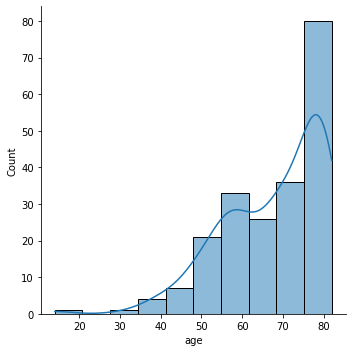

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

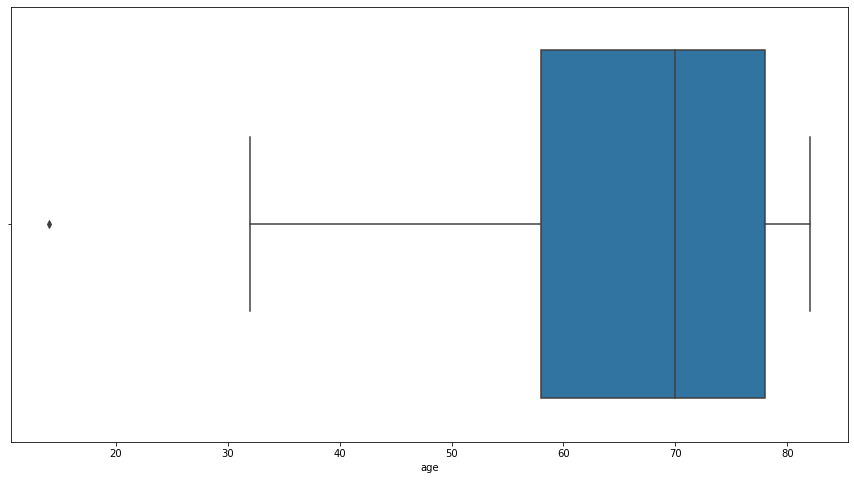

In [59]:
sns.displot(df_strokes['age'], bins=10, kde=True)
plt.show()
sns.boxplot(df_strokes.age)

### Há a existência de 1 outlier respetivo a um registo de uma criaça de 14 anos. A partir dos +/- 58 anos a probabilidade de ter um avc aumenta drasticamente, sendo a idade e todos os problemas associados o maior fator responsável pelos avcs.

In [60]:
# Falta avaliar de que forma a obesidade e os diabetes afetam as pessoas com strokes
# Pela distribuição avalir os dados disponiveis de bmi e diabetes
# Verificar a correlação entre as variáveis de saude

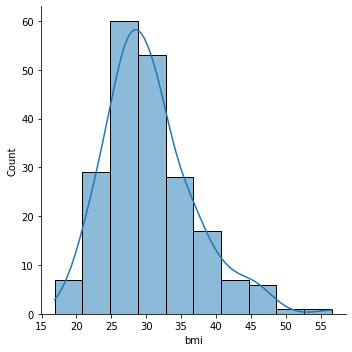

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

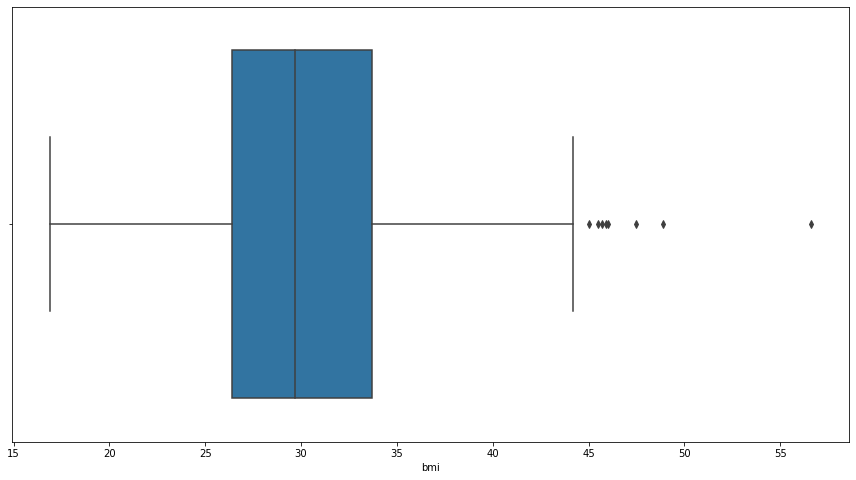

In [61]:
sns.displot(df_strokes.bmi, bins=10, kde=True)
plt.show()
sns.boxplot(df_strokes.bmi)

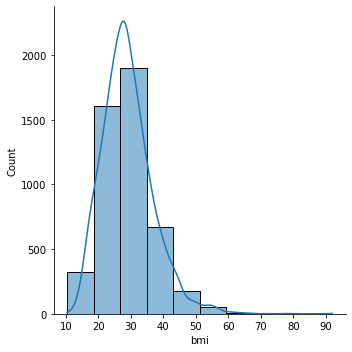

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

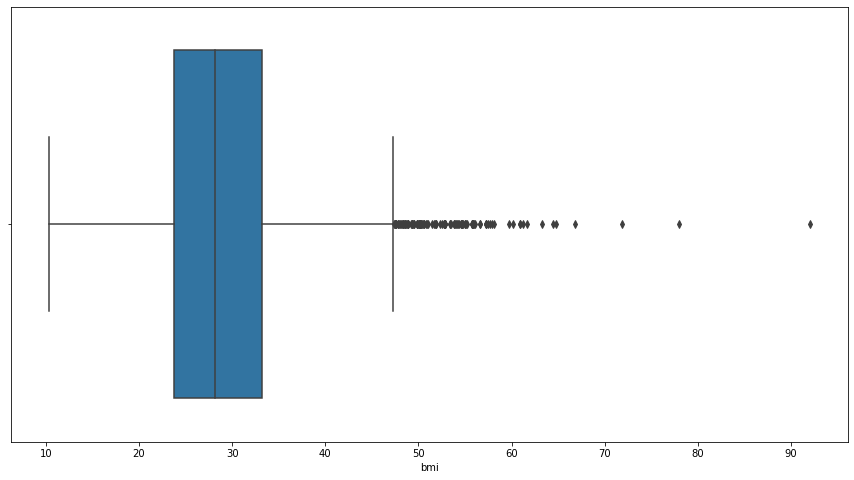

In [62]:
sns.displot(df1.bmi, bins=10, kde=True)
plt.show()
sns.boxplot(df1.bmi)

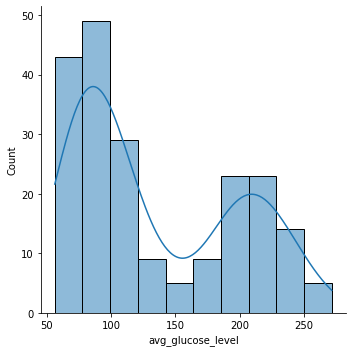

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

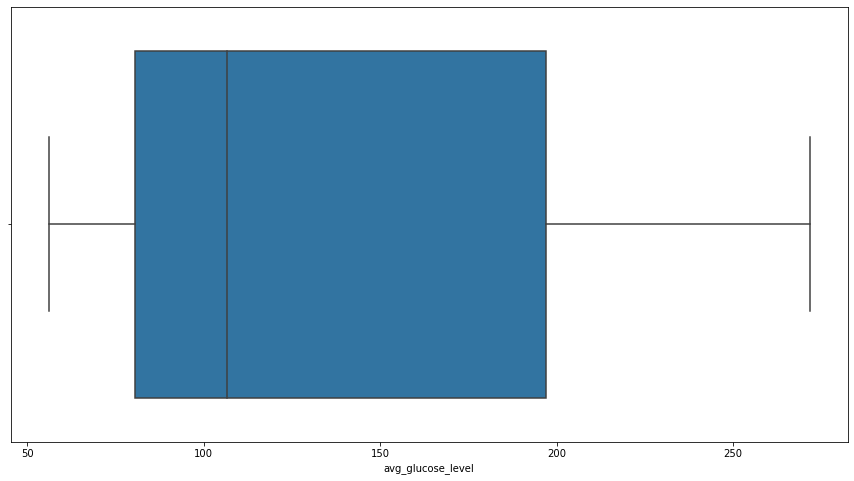

In [63]:
sns.displot(df_strokes.avg_glucose_level, bins=10, kde=True)
plt.show()
sns.boxplot(df_strokes.avg_glucose_level)

### Notas - sobre as pessoas que tiveram AVCs - Parte 2:
- 75% dos avc acontecem depois dos 58 anos;
- Os avcs em pessoas com obesidade acontece com bmi entre 26,4 e 33.7, sendo que existem bastantes outliers que mostra hoaver bastantes casos de pessoas com grau elevados de obesidade;
- A pessoas com nivel de diabetes controlados - menor que 200 - têm menos probabilidade de ter um avc (??calcular estas probabilidades para mostrar??);

### Análises de features relevantes

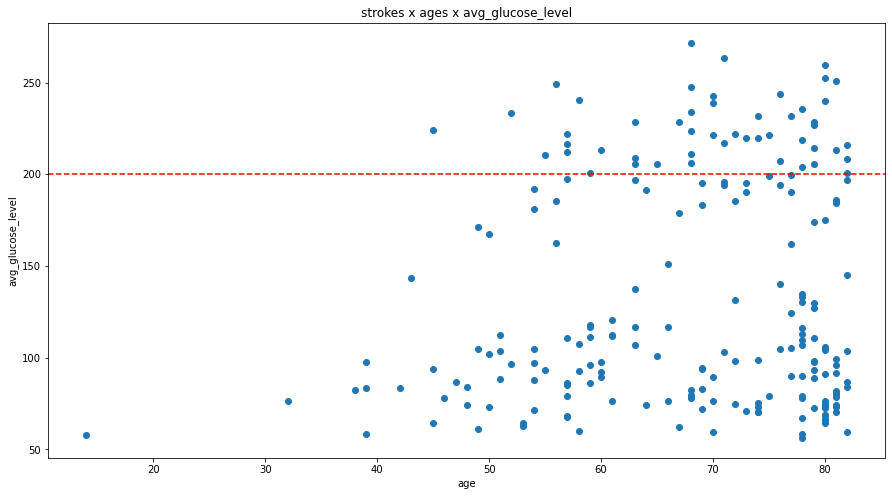

In [64]:
plt.scatter(df_strokes.age, df_strokes.avg_glucose_level)
plt.xlabel("age")
plt.ylabel("avg_glucose_level")
plt.title("strokes x ages x avg_glucose_level")
plt.axhline(y=200, color='red', linestyle='--')
plt.show()
plt.show()

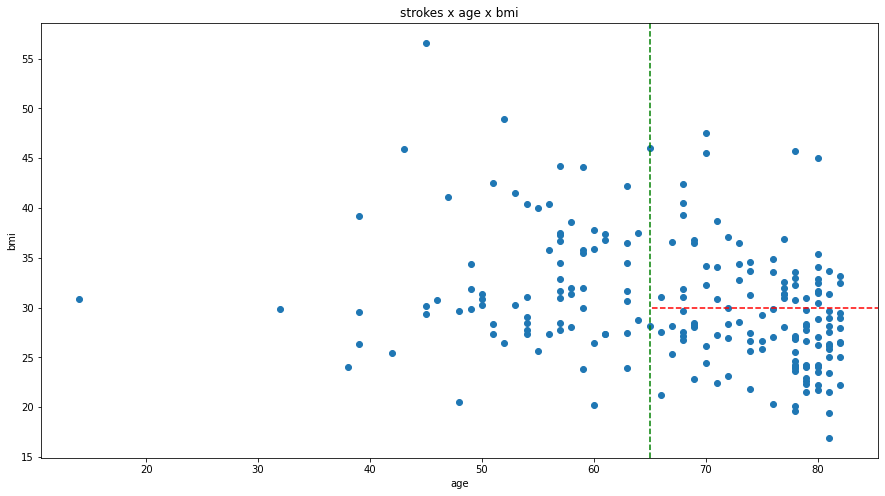

In [65]:
plt.scatter(df_strokes.age, df_strokes.bmi)
plt.xlabel("age")
plt.ylabel("bmi")
plt.title("strokes x age x bmi")
plt.axvline(x=65, color='green', linestyle='--')
plt.axhline(y=30, xmin=0.73, xmax = 1, color='red', linestyle='--')
plt.show()

In [66]:
# Quantas pessoas, acima dos 50 e tal anos, sem obesidade e sem diabates tiveram avc? e o seu contrário? (%)
# sem obesidade bmi < 30
# sem diabetes avg_glucose_level < 180

Text(0.5, 1.0, 'stroke x (bmi, avg_glucose_level, heart_disease & hypertension)')

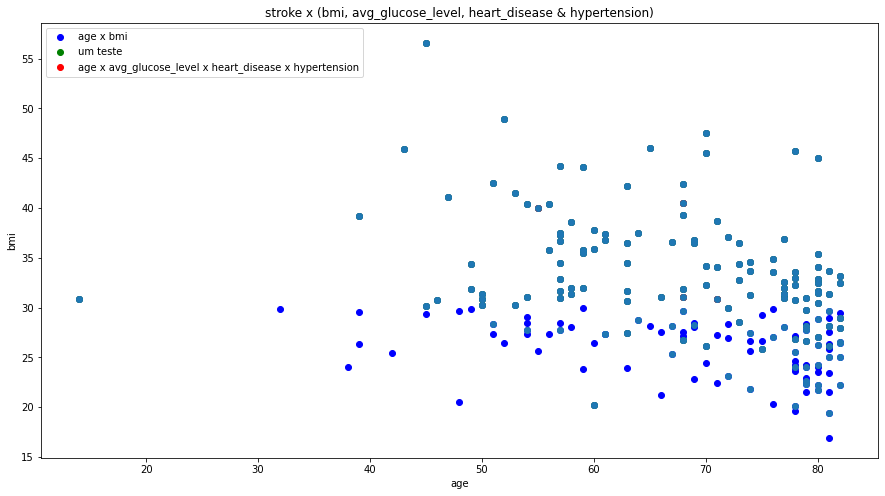

In [67]:
plt.scatter(df_strokes.age, df_strokes.bmi, color='blue', label='age x bmi')
x = df_strokes[(df_strokes.bmi > 30) | (df_strokes.avg_glucose_level >= 200)]
plt.scatter(x.age, x.bmi, color='green', label='um teste')
y = df_strokes[(df_strokes.bmi > 30) & (df_strokes.avg_glucose_level >= 200) & (df_strokes.heart_disease == 1) & (df_strokes.hypertension == 1)]
plt.scatter(y.age, y.bmi, color='red', label='age x avg_glucose_level x heart_disease x hypertension')
z = df_strokes[(df_strokes.bmi > 30) | (df_strokes.avg_glucose_level >= 200) | (df_strokes.heart_disease == 1) | (df_strokes.hypertension == 1)]
plt.scatter(z.age, z.bmi)
# y = df_strokes[(df_strokes.heart_disease == 1)]
# plt.scatter(y.age, y.bmi)
# z = df_strokes[(df_strokes.hypertension == 1)]
# plt.scatter(z.age, z.bmi)

plt.xlabel("age")
plt.ylabel("bmi")
plt.legend(loc='upper left')
plt.title("stroke x (bmi, avg_glucose_level, heart_disease & hypertension)")

### Comparação entre individuos saudaveis e individous com qualquer problema de saude

186 209


Text(0.5, 1.0, 'Individuos c/ AVC que qualquer um dos problemas de saude: bmi, avg_glucose_level, heart_disease ou hypertension')

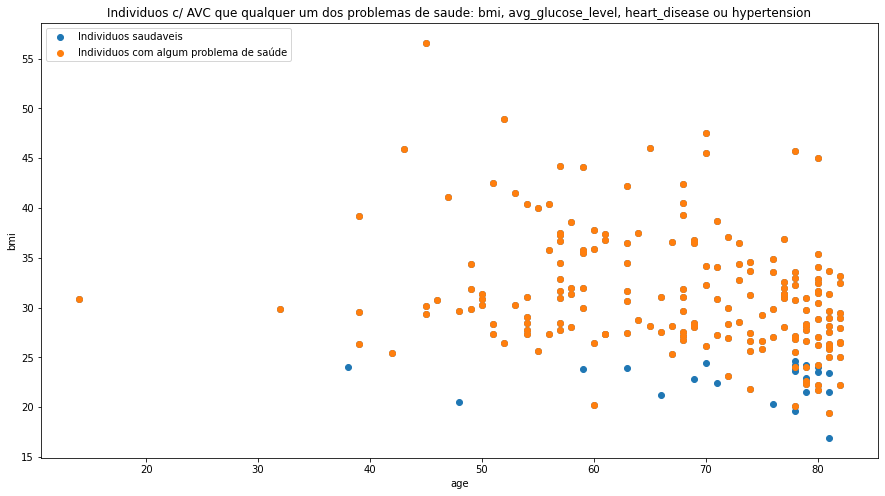

In [68]:
# excesso de peso ou
# diabetico ou
# doença cardiaca
# hipertenso
plt.scatter(df_strokes.age, df_strokes.bmi, label='Individuos saudaveis')
z = df_strokes[(df_strokes.bmi > 25) | (df_strokes.avg_glucose_level >= 280) | (df_strokes.heart_disease == 1) | (df_strokes.hypertension == 1)]
print(z.shape[0], df_strokes.shape[0])
plt.scatter(z.age, z.bmi, label='Individuos com algum problema de saúde')

plt.xlabel("age")
plt.ylabel("bmi")
plt.legend(loc='upper left')
plt.title("Individuos c/ AVC que qualquer um dos problemas de saude: bmi, avg_glucose_level, heart_disease ou hypertension")

### Comparação entre individous com e sem diabates ou obesidade

49 209
0 209


Text(0.5, 1.0, 'Comparação entre individuos c/ AVC com problemas de saude bmi, avg_glucose_level')

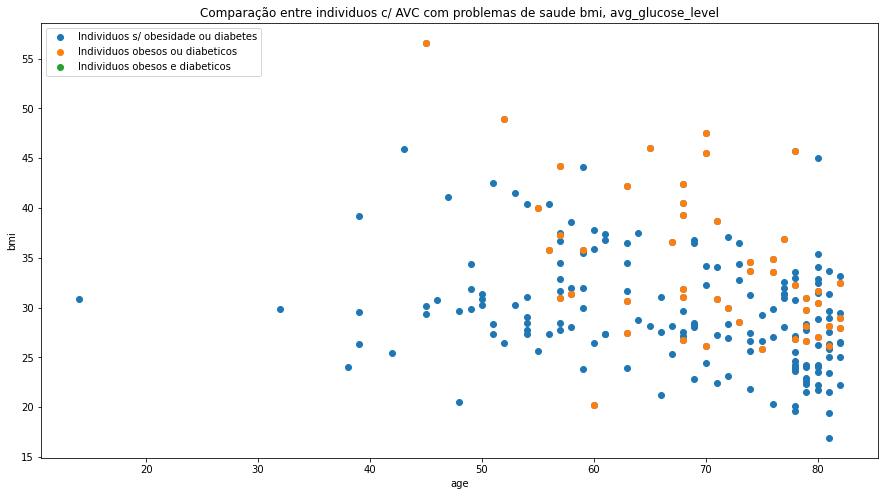

In [69]:
plt.scatter(df_strokes.age, df_strokes.bmi, label='Individuos s/ obesidade ou diabetes')
z = df_strokes[((df_strokes.bmi > 30) & (df_strokes.bmi < 20)) | (df_strokes.avg_glucose_level >= 200)]
print(z.shape[0], df_strokes.shape[0])
plt.scatter(z.age, z.bmi, label='Individuos obesos ou diabeticos')
y = df_strokes[((df_strokes.bmi > 30) & (df_strokes.bmi < 20)) & (df_strokes.avg_glucose_level >= 200)]
print(y.shape[0], df_strokes.shape[0])
plt.scatter(y.age, y.bmi, label='Individuos obesos e diabeticos')

plt.xlabel("age")
plt.ylabel("bmi")
plt.legend(loc='upper left')
plt.title("Comparação entre individuos c/ AVC com problemas de saude bmi, avg_glucose_level")

### Análise de estilo de vida para a prevenção de AVC - Comparação bmi, avg_glucose_level e hypertensão

% AVCs em individuos com pelo menos das seguintes condições - diabetes, obesidade ou hipertensão: 66.50717703349282


Text(0.5, 1.0, 'Comparação de AVC entre individuos com e sem obesidade ou diabetes ou hipertensão')

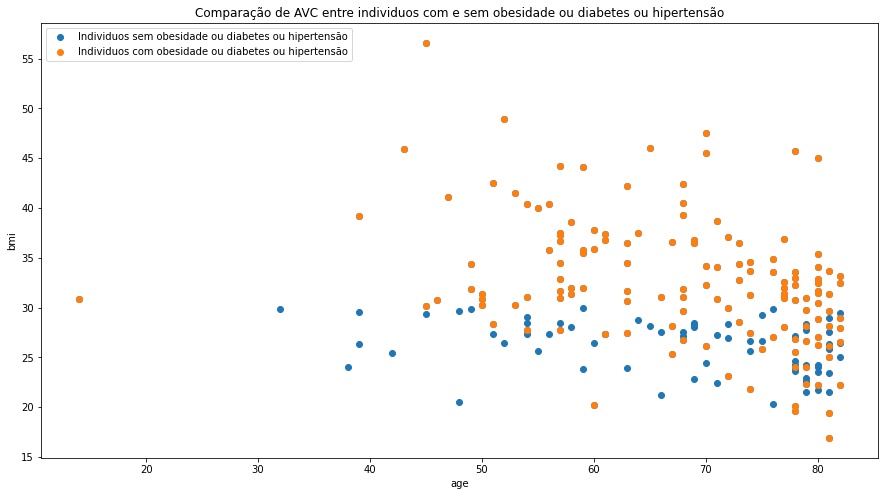

In [82]:
plt.scatter(df_strokes.age, df_strokes.bmi, label='Individuos sem obesidade ou diabetes ou hipertensão')
z = df_strokes[((df_strokes.bmi > 30) | (df_strokes.bmi < 20)) | (df_strokes.avg_glucose_level > 200) | (df_strokes.hypertension == 1)]
# print(z.shape[0], df_strokes.shape[0])
plt.scatter(z.age, z.bmi, label='Individuos com obesidade ou diabetes ou hipertensão')
# y = df_strokes[((df_strokes.bmi > 30) & (df_strokes.bmi < 20)) & (df_strokes.avg_glucose_level >= 180)]
# print(y.shape[0], df_strokes.shape[0])
# plt.scatter(y.age, y.bmi, label='Individuos obesos e diabeticos')

print("% AVCs em individuos com pelo menos das seguintes condições - diabetes, obesidade ou hipertensão:", (z.shape[0]*100)/df_strokes.shape[0])

plt.xlabel("age")
plt.ylabel("bmi")
plt.legend(loc='upper left')
plt.title("Comparação de AVC entre individuos com e sem obesidade ou diabetes ou hipertensão")

Peso dos diabetes em individuos com AVC

In [75]:
df_avc_bmi = df_strokes[((df_strokes.bmi > 30) | (df_strokes.bmi < 20))]
df_avc_bmi.shape[0]
print("% AVCs em individuos com obesidade:", (df_avc_bmi.shape[0]*100)/df_strokes.shape[0])

% AVCs em individuos com diabetes: 47.36842105263158 %


In [77]:
df_avc_glucose = df_strokes[(df_strokes.avg_glucose_level > 200)]
df_avc_glucose.shape[0]
print("% AVCs em individuos com diabetes:", (df_avc_glucose.shape[0]*100)/df_strokes.shape[0])

% AVCs em individuos com diabetes: 23.444976076555022


In [78]:
df_avc_hypertension = df_strokes[(df_strokes.hypertension == 1)]
df_avc_hypertension.shape[0]
print("% AVCs em individuos com hipertensão:", (df_avc_hypertension.shape[0]*100)/df_strokes.shape[0])

% AVCs em individuos com hipertensão: 28.708133971291865


In [76]:
df_avc_heart = df_strokes[(df_strokes.heart_disease == 1)]
df_avc_heart.shape[0]
print("% AVCs em individuos com doença cardiaca:", (df_avc_heart.shape[0]*100)/df_strokes.shape[0])

% AVCs em individuos com doença cardiaca: 19.138755980861244
